In [ ]:
# LSTM(Long Short-Term Memory) 모델을 구현하는 예제 코드입니다. 
# 이 코드는 IMDB 영화 리뷰 감정 분석 데이터셋을 사용하여, LSTM 모델을 학습하고 감정을 예측하는 과정

# 영화 감정분석

## 라이브러리

In [1]:
# 필요한 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 하이퍼파라미터

In [2]:
# 하이퍼파라미터 설정
max_features = 10000  # 사용할 단어의 최대 개수 (상위 10,000개 단어 사용)
maxlen = 100  # 각 리뷰의 최대 길이 (100개의 단어로 제한)

## 데이터 로드

In [3]:
# 데이터 로드 및 전처리:

# imdb.load_data() 함수를 사용해 IMDB 영화 리뷰 데이터셋을 로드합니다. 
#  이 데이터셋은 이진 분류 문제로, 영화 리뷰가 긍정인지 부정인지 예측하는 문제입니다.
# 각 리뷰는 단어의 시퀀스로 표현되며, 최대 10,000개의 상위 단어만 사용합니다.
# 리뷰의 길이가 다르므로, pad_sequences를 사용하여 각 리뷰를 100개의 단어로 맞춥니다. 
# 길이가 100보다 짧은 리뷰는 패딩을 추가하고, 길면 자릅니다.

In [5]:
# IMDB 데이터셋 로드 (훈련 데이터와 테스트 데이터 분리)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

## 시퀀스 패딩

In [7]:
# 시퀀스 패딩 (각 리뷰의 길이를 동일하게 100으로 맞춤)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

## 모델링

### 모델 정의

In [8]:
# LSTM 모델 정의:

# Embedding 층: 입력 단어를 고차원 밀집 벡터로 변환합니다. 입력 단어의 개수는 최대 10,000개이고, 각 단어는 32차원의 벡터로 변환됩니다.
# LSTM 층: 100개의 유닛을 가진 LSTM(Long Short-Term Memory) 층입니다. return_sequences=False로 설정하여, 마지막 출력만 반환하여 다음 층으로 전달합니다.
# 출력층(Dense): 감정이 긍정인지 부정인지 예측하는 이진 분류 문제이므로, 1개의 노드와 시그모이드(Sigmoid) 활성화 함수를 사용합니다.

In [10]:
# LSTM 모델 정의
model = Sequential()

# Embedding 층: 단어를 밀집 벡터로 변환, 입력 차원은 max_features, 출력 차원은 32
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))

# LSTM 층: 100개의 유닛을 사용
model.add(LSTM(100, return_sequences=False))

# 출력층 (Dense): 1개의 노드, 활성화 함수: Sigmoid (이진 분류 문제이므로)
model.add(Dense(1, activation='sigmoid'))


### 모델 컴파일

In [11]:
# 손실 함수로 binary_crossentropy를 사용하며, 이진 분류 문제에 적합한 손실 함수입니다.
# 최적화 방법으로 Adam을 사용하여 경사 하강법을 최적화합니다.
# 성능 평가 지표로 **accuracy(정확도)**를 사용합니다.

In [12]:
# 모델 컴파일 (손실 함수: Binary Crossentropy, 최적화 방법: Adam, 평가지표: Accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 학습

In [13]:
# 5 에포크 동안 학습하며, 배치 크기 64로 설정하여 학습을 진행합니다.
# 학습 중간에 테스트 데이터를 사용해 검증도 수행합니다.

In [14]:

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - accuracy: 0.6519 - loss: 0.5841 - val_accuracy: 0.8492 - val_loss: 0.3445
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 192ms/step - accuracy: 0.8890 - loss: 0.2799 - val_accuracy: 0.8513 - val_loss: 0.3435
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 165ms/step - accuracy: 0.9175 - loss: 0.2127 - val_accuracy: 0.8416 - val_loss: 0.3910
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 157ms/step - accuracy: 0.9373 - loss: 0.1657 - val_accuracy: 0.8419 - val_loss: 0.4042
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accuracy: 0.9570 - loss: 0.1261 - val_accuracy: 0.8282 - val_loss: 0.5269


### 모델 평가

In [15]:
# 학습이 완료되면 테스트 데이터셋에서 모델 성능을 평가하고 정확도(accuracy)를 출력합니다.

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8276 - loss: 0.5309
Test Accuracy: 82.82%


## 예측

In [17]:
# 학습된 모델을 사용해 테스트 데이터에 대한 예측값을 생성합니다.
# 결과 출력
# 모델 학습이 완료되면 다음과 같은 정보가 출력됩니다:

# Test Accuracy: 테스트 데이터셋에서의 정확도를 퍼센트로 표시합니다.

In [18]:
# 예측 (테스트 데이터에 대한 예측)
predictions = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step


## 종합

In [ ]:
# 필요한 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 하이퍼파라미터 설정
max_features = 10000  # 사용할 단어의 최대 개수 (상위 10,000개 단어 사용)
maxlen = 100  # 각 리뷰의 최대 길이 (100개의 단어로 제한)

# IMDB 데이터셋 로드 (훈련 데이터와 테스트 데이터 분리)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스 패딩 (각 리뷰의 길이를 동일하게 100으로 맞춤)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# LSTM 모델 정의
model = Sequential()

# Embedding 층: 단어를 밀집 벡터로 변환, 입력 차원은 max_features, 출력 차원은 32
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))

# LSTM 층: 100개의 유닛을 사용
model.add(LSTM(100, return_sequences=False))

# 출력층 (Dense): 1개의 노드, 활성화 함수: Sigmoid (이진 분류 문제이므로)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (손실 함수: Binary Crossentropy, 최적화 방법: Adam, 평가지표: Accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 예측 (테스트 데이터에 대한 예측)
predictions = model.predict(X_test)


# 주가 예측 사례

In [ ]:
# 코드 설명
# 데이터 로드: yfinance를 사용해 삼성전자(005930.KS) 일별 종가 데이터를 가져옵니다.
# 데이터 전처리: MinMaxScaler로 종가 데이터를 정규화하고, 훈련 및 테스트 세트를 8:2 비율로 나눕니다.
# 데이터셋 생성: 시퀀스 길이를 60으로 설정해 훈련과 테스트용 시퀀스 데이터셋을 생성합니다.
# LSTM 모델 구성: 두 개의 LSTM 레이어와 완전 연결 레이어로 모델을 구성하고, adam 옵티마이저와 평균 제곱 오차(MSE) 손실 함수를 사용해 컴파일합니다.
# 예측 및 역정규화: 예측 결과를 역정규화하여 실제 주가 단위로 변환합니다.
# 결과 시각화: 훈련 데이터와 테스트 데이터, 예측된 데이터를 시각화하여 모델 성능을 평가합니다.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. 삼성전자 주가 데이터 가져오기 (005930.KS는 삼성전자의 티커)
df = yf.download('005930.KS', start='2020-01-01', end='2023-12-31')
df = df[['Close']]  # 종가만 사용

# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_data_len]
test_data = scaled_data[train_data_len - 60:]

# 3. LSTM 모델 입력 데이터 생성
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 4. LSTM 모델 구성 및 학습
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

# 5. 예측 및 결과 평가
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

y_test_scaled = scaler.inverse_transform([y_test])

# 6. 결과 시각화
train_data = df[:train_data_len]
valid_data = df[train_data_len:]
valid_data['Predictions'] = predictions

plt.figure(figsize=(14, 7))
plt.plot(train_data['Close'], label='Train Data')
plt.plot(valid_data['Close'], label='Actual Price')
plt.plot(valid_data['Predictions'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.show()


향후 60일간 주가를 예측하는 코드

In [ ]:
# 코드 설명
# 마지막 60일 데이터 준비: last_60_days는 현재 데이터에서 가장 최근 60일의 데이터를 가져옵니다.
# 예측 반복: 각 미래 날짜의 주가를 예측하고 이를 last_60_days에 추가해, 다음 날 예측 시 최신 데이터를 사용할 수 있도록 합니다.
# 역정규화: MinMaxScaler의 inverse_transform을 사용해 원래 가격 단위로 변환합니다.
# 미래 예측 시각화: 원래 데이터와 향후 60일 예측값을 시각화해 예측 추세를 확인합니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

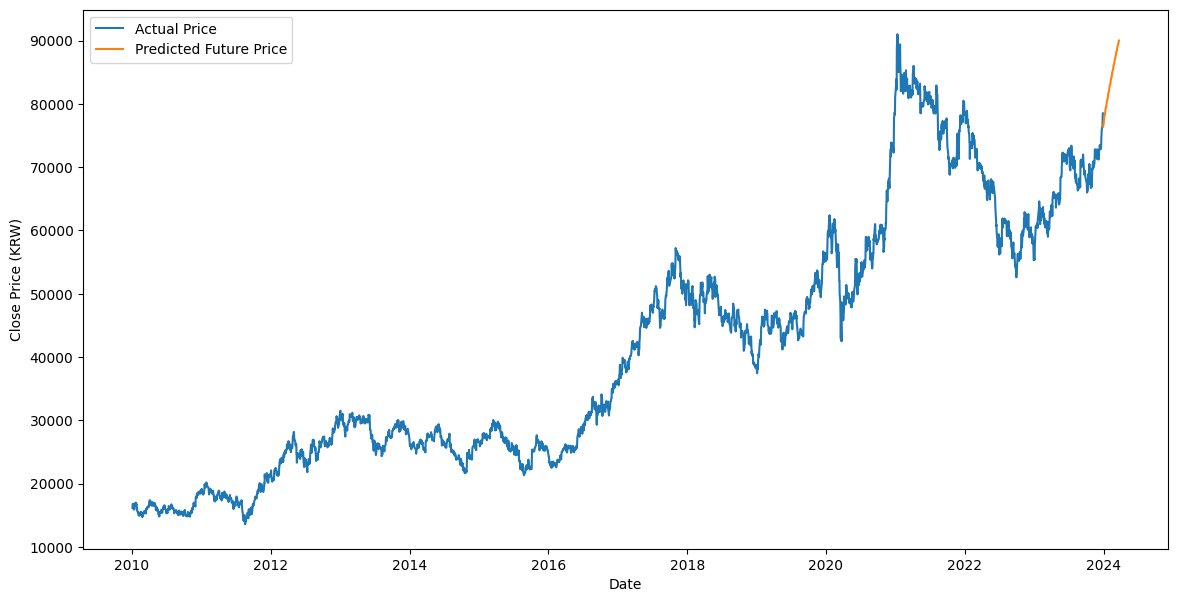

In [2]:
# 5. 향후 60일 주가 예측
future_days = 60
last_60_days = scaled_data[-60:]  # 마지막 60일 데이터 가져오기
predicted_future_prices = []

for _ in range(future_days):
    X_future = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))
    future_price = model.predict(X_future)
    predicted_future_prices.append(future_price[0, 0])
    
    # 예측값을 추가하여 다음 입력 데이터 준비
    last_60_days = np.append(last_60_days, future_price)
    last_60_days = last_60_days[1:]  # 새로운 60일 데이터 유지

# 예측한 값 역정규화
predicted_future_prices = np.array(predicted_future_prices).reshape(-1, 1)
predicted_future_prices = scaler.inverse_transform(predicted_future_prices)

# 6. 예측 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Actual Price')
plt.plot(
    pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='B'), 
    predicted_future_prices, label='Predicted Future Price'
)
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.legend()
plt.show()
